*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called `predict_message` that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the [SMS Spam Collection dataset](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.


In [1]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575.9 MB 13 kB/s 
     |████████████████████████████████| 1.7 MB 48.6 MB/s 
     |████████████████████████████████| 5.8 MB 32.1 MB/s 
     |████████████████████████████████| 438 kB 48.4 MB/s 
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.10.0-dev20220625


In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2022-06-25 17:03:19--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.02s   

2022-06-25 17:03:19 (15.3 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2022-06-25 17:03:19--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==============

In [7]:
train_file_path

'train-data.tsv'

In [307]:

# data = pd.read_csv(train_file_path)
data=pd.read_csv(train_file_path, sep='\t',header=None)
data.columns = ['tipo','mens']
data.head()

,tipo,mens
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [308]:
data.columns = ['tipo','mens']
data.head()

,tipo,mens
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [309]:
# data_val=pd.read_csv(test_file_path, sep='\t', header=0)
data_val=pd.read_csv(test_file_path, sep='\t', header=None)
data_val.columns = ['tipo','mens']
data_val.head()

,tipo,mens
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?


In [310]:
data.shape,data_val.shape

((4179, 2), (1392, 2))

ham     0.865997
spam    0.134003
Name: tipo, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


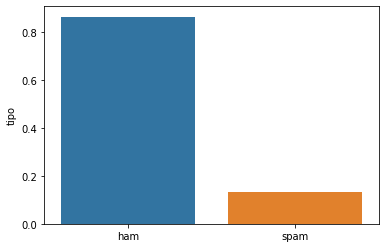

In [311]:
## renombro por prolijidad pero sino se llama como data[0] o data[1]
import seaborn as sns
x=data['tipo'].value_counts()/len(data)
print(x)
sns.barplot(x.index,x)

In [312]:
data.isna().sum()
## no hay nans
data['tipo']=np.where(data['tipo']=="spam",1,0)
data_val['tipo']=np.where(data_val['tipo']=="spam",1,0)

In [356]:
# longitud de mensajes segun si es spam o ham
tmp=data
tmp['word_count'] =tmp['mens'].apply(lambda x: len(str(x).split()))
print(tmp[tmp['tipo']==1]['word_count'].mean()) #spam
print(tmp[tmp['tipo']==0]['word_count'].mean()) #ham 

23.875
14.324675324675324


In [359]:
tmp['char_count'] = tmp['mens'].apply(lambda x: len(str(x)))

print(tmp[tmp['tipo']==1]['char_count'].mean()) #spam
print(tmp[tmp['tipo']==0]['char_count'].mean()) #ham 

# data_val['char_count'] = data_val['mens'].apply(lambda x: len(str(x)))

# data['word_count'] =data['mens'].apply(lambda x: len(str(x).split()))
# data_val['word_count'] =data_val['mens'].apply(lambda x: len(str(x).split()))
# print(data[data['tipo']==1]['char_count'].mean()) 
# print(data[data['tipo']==0]['char_count'].mean())

## basicamente tienen mas caracteres y mas palabras los mensajes spam

138.75
71.45620337109699


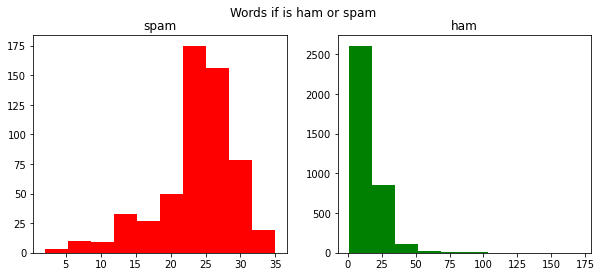

In [218]:

# dibujamos la distribucion del  len segun sea ham or spam
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=data[data['tipo']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('spam')
train_words=data[data['tipo']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('ham')
fig.suptitle('Words if is ham or spam')
plt.show()


138.75
71.45620337109699


In [315]:
data_val.head()

,tipo,mens,char_count,word_count
0,0,i am in hospital da. . i will return home in e...,52,12
1,0,"not much, just some textin'. how bout you?",42,8
2,0,i probably won't eat at all today. i think i'm...,94,20
3,0,don‘t give a flying monkeys wot they think and...,103,20
4,0,who are you seeing?,19,4


In [316]:
import re
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
# stopwords.remove("not")


# Removing punctuations from the incidents descriptions
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['clean_mens'] = data['mens'].apply(preprocess)

data_val['clean_mens'] = data_val['mens'].apply(preprocess)
                                                
data['clean_mens'] = data['clean_mens'].apply(remove_punctuations)

data_val['clean_mens'] = data_val['clean_mens'].apply(remove_punctuations)

# print(list(data))
print(data.head())
# Getting stop words
stopwords = set(STOPWORDS)
# stopwords.remove("not")


   tipo                                               mens  word_count  \
0     0  ahhhh...just woken up!had a bad dream about u ...          30   
1     0                           you can never do nothing           5   
2     0  now u sound like manky scouse boy steve,like! ...          22   
3     0  mum say we wan to go then go... then she can s...          17   
4     0  never y lei... i v lazy... got wat? dat day ü ...          18   

   char_count                                         clean_mens  
0         146  ahhhh just woken up had a bad dream about u th...  
1          24                           you can never do nothing  
2         115  now u sound like manky scouse boy steve like i...  
3          83  mum say we wan to go then go then she can shun...  
4          77  never y lei i v lazy got wat dat day ü send me...  


In [317]:
# Applying the TF-IDF algorithm
tfidf_vectorizer = TfidfVectorizer(stop_words = stopwords, min_df = 0.01, max_df = 0.99, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b').fit(data['clean_mens'])

df_tfidf = pd.DataFrame(tfidf_vectorizer.transform(data['clean_mens']).toarray(), columns=sorted(tfidf_vectorizer.vocabulary_.keys()))
df_tfidf_val = pd.DataFrame(tfidf_vectorizer.transform(data_val['clean_mens']).toarray(), columns=sorted(tfidf_vectorizer.vocabulary_.keys()))

words_train = list(df_tfidf) # Saving features names (words)
words_val=list(df_tfidf_val) 
# df_tfidf['tipo'] = (data['tipo'])
# df_tfidf_val['tipo'] = (data_val['tipo'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


In [318]:
df_tfidf.shape,df_tfidf_val.shape,data.shape,data_val.shape


((4179, 149), (1392, 149), (4179, 5), (1392, 5))

pandas.core.frame.DataFrame

In [351]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
gbm2= GradientBoostingClassifier(random_state=0)
y_train=data['tipo']
y_test= data_val['tipo']

X_train,X_test=df_tfidf,df_tfidf_val

# X_train=pd.concat([X_train,data['char_count'],data['word_count']],axis=1)
# X_test=pd.concat([X_test,data_val['char_count'],data_val['word_count']],axis=1)

In [395]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train, y_train)  
#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test)
y_prob = lr_tfidf.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1205
           1       0.92      0.87      0.90       187

    accuracy                           0.97      1392
   macro avg       0.95      0.93      0.94      1392
weighted avg       0.97      0.97      0.97      1392

Confusion Matrix: [[1191   14]
 [  24  163]]
AUC: 0.980078549714869


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [331]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb


np.random.seed(10)


# d1 = np.random.randint(2, size=(100, 9))
# d2 = np.random.randint(3, size=(100, 9))
# d3 = np.random.randint(4, size=(100, 9))
# Y = np.random.randint(7, size=(100,))


# X = np.column_stack([d1, d2, d3])

rs_params = {

        'bagging_fraction': (0.5, 0.8,0.9),
        'bagging_frequency': (2,5, 8),

        'feature_fraction': (0.5, 0.8),
        'max_depth': (1,3,10, 20),
        'min_data_in_leaf': (30,90, 120),
        'num_leaves': (600,1200, 1550)

}

# Initialize a RandomizedSearchCV object using 5-fold CV-
rs_cv = RandomizedSearchCV(estimator=lgb.LGBMClassifier(), scoring='f1_weighted',param_distributions=rs_params, cv = 5, n_iter=100,verbose=1)

# Train on training data-
rs_cv.fit(X_train, y_train,verbose=1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=100,
                   param_distributions={'bagging_fraction': (0.5, 0.8, 0.9),
                                        'bagging_frequency': (2, 5, 8),
                                        'feature_fraction': (0.5, 0.8),
                                        'max_depth': (1, 3, 10, 20),
                                        'min_data_in_leaf': (30, 90, 120),
                                        'num_leaves': (600, 1200, 1550)},
                   scoring='f1_weighted', verbose=1)

In [332]:
from sklearn.metrics import classification_report
y_pred =rs_cv.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1229
           1       0.85      0.98      0.91       163

    accuracy                           0.98      1392
   macro avg       0.92      0.98      0.95      1392
weighted avg       0.98      0.98      0.98      1392



In [428]:
dataset =X_train.to_numpy()
dataset_test = X_test.to_numpy()

In [477]:
len(X_train.keys())

149

In [485]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout , Activation
from tensorflow.keras.optimizers import Adam

def build_model():
  # model = keras.Sequential([
  #   layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
  #   layers.Dense(64, activation='relu'),
  #   layers.Dense(1)
  # ])

  # optimizer = tf.keras.optimizers.RMSprop(0.001)

  # model.compile(loss='mse',
  #               optimizer=optimizer,
  #               metrics=['mae', 'mse'])
  num_neuronas = 64 
  model= keras.Sequential([
    layers.Dense(num_neuronas, activation='relu', input_shape=[len(X_train.keys())]), ### numero de columnas, en imagenes es dim_imgxdim_img,3
    # layers.Dense(num_neuronas, activation='relu'),
    # layers.Dropout((0.4)),
    # layers.Dense(num_neuronas, activation='relu'),
    # layers.Dense(num_neuronas, activation='relu'),
    layers.Dropout((0.4)),
    layers.Dense(1,activation='sigmoid')
  ])

#Añadir un número de neuronas similar al número de features en X_train - 7 en el ejemplo

  # model.add(Dense(num_neuronas,activation='relu'))
  # model.add(Dense(num_neuronas,activation='relu'))
  # model.add(Dense(num_neuronas,activation='relu'))
  # model.add(Dense(num_neuronas,activation='relu'))
  # model.add(Dense(1)) # Indicar tantas neuronas de salida como variables a predecir, en este caso solo 1 variable "buy_price"

  opt = Adam(lr=0.001)
  model.compile(optimizer = opt , loss =tf.keras.losses.BinaryCrossentropy() , metrics = ['Recall'])
  # model.compile(optimizer = opt ,loss='mse', metrics=['mae', 'mse'])
  # model.compile(optimizer='adam',loss='mse')
  return model

model= build_model()
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 64)                9600      
                                                                 
 dropout_27 (Dropout)        (None, 64)                0         
                                                                 
 dense_155 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,665
Trainable params: 9,665
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [486]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.fit(x=dataset,y=y_train2,
          validation_data=(dataset_test,y_test2), 
           callbacks=[es],#si indicamos validation_data en cada epoch calcula sobre el conjunto de test el resultado de pérdidas
          batch_size=128,epochs=200) #batch_size es el tamaño de datos que toma en cada  potencia de 2) / epochs es el número de iteraciones sobre la red neuronal para ajustar los pesos (w) y bias (b)

Epoch 1/200
33/33 [==============================] - 1s 11ms/step - loss: 0.5935 - recall: 0.1625 - val_loss: 0.5153 - val_recall: 0.0053
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 0.4489 - recall: 0.0214 - val_loss: 0.3816 - val_recall: 0.0214
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 0.3386 - recall: 0.0518 - val_loss: 0.2901 - val_recall: 0.1551
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 0.2669 - recall: 0.2250 - val_loss: 0.2306 - val_recall: 0.4064
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 0.2151 - recall: 0.4768 - val_loss: 0.1866 - val_recall: 0.6257
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 0.1764 - recall: 0.6625 - val_loss: 0.1551 - val_recall: 0.7594
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 0.1503 - recall: 0.7482 - val_loss: 0.1338 - val_recall: 0.8182
Epoch 8/200
33/33 [=====================

In [437]:
test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]
# from collections.abc import Iterable

 
# pred=pd.DataFrame()
vari=test_messages
# if iter(vari):
#   pred  = pd.DataFrame(vari)
#   pred.columns= ['clean_mens_2']
# else:  
  # pred  = pd.DataFrame([vari])
  # pred.columns= ['clean_mens_2']
try:
  pred  = pd.DataFrame([vari])
  pred.columns= ['clean_mens']
except:
    pred  = pd.DataFrame(vari)
    pred.columns= ['clean_mens'] 


# pred = pd.DataFrame(columns = ['clean_mens_2'])

# pred  = pd.DataFrame(test_messages)

# # print(len(pred_text))
# pred  = pd.DataFrame([pred_text])

# pred.columns= ['clean_mens_2']

pred.head()

pred['clean_mens'] = pred['clean_mens'].apply(remove_punctuations)

pred['clean_mens'] = pred['clean_mens'].apply(preprocess)

pred.head()

,clean_mens
0,how are you doing today
1,sale today to stop texts call
2,i dont want to go can we try it a different da...
3,our new mobile video service is live just inst...
4,you have won cash call to claim your prize


In [438]:
df_tfidf_val2 = pd.DataFrame(tfidf_vectorizer.transform(pred['clean_mens']).toarray(), columns=sorted(tfidf_vectorizer.vocabulary_.keys()))

In [439]:
y_pred2 =rs_cv.predict(df_tfidf_val2)


y_pred2=np.where(y_pred2 ==0,"ham","spam")

y_pred2

array(['ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham'], dtype='<U4')

In [488]:
proba=model.predict(df_tfidf_val2.to_numpy())
y_pred3=np.where(proba>=0.5,"spam","ham")
y_pred3

1/1 [==============================] - 0s 139ms/step


array([['ham'],
       ['spam'],
       ['ham'],
       ['spam'],
       ['spam'],
       ['ham'],
       ['ham']], dtype='<U4')

In [489]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  try:
    pred  = pd.DataFrame([pred_text])
    pred.columns= ['clean_mens']
  except:
    pred  = pd.DataFrame(pred_text)
    pred.columns= ['clean_mens'] 

  pred['clean_mens'] = pred['clean_mens'].apply(remove_punctuations)

  # pred['clean_mens'] = pred['clean_mens'].apply(preprocess)
  df_tfidf_val2 = pd.DataFrame(tfidf_vectorizer.transform(pred['clean_mens']).toarray(), columns=sorted(tfidf_vectorizer.vocabulary_.keys()))
  # y_pred2 =rs_cv.predict(df_tfidf_val2)
  # y_pred2 =      lr_tfidf.predict(df_tfidf_val2)
  y_pred2 = model.predict(df_tfidf_val2.to_numpy())
  y_pred2 = np.where(y_pred2>=0.5,1,0)
  prediction=np.where(y_pred2 ==0,"ham","spam")
  prediction=(y_pred2,prediction)
  return ( prediction)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

1/1 [==============================] - 0s 22ms/step
(array([[0]]), array([['ham']], dtype='<U4'))


In [490]:
test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
passed = True

for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

if passed:
      print("You passed the challenge. Great job!")
else:
      print("You haven't passed yet. Keep trying.")             

1/1 [==============================] - 0s 23ms/step
You passed the challenge. Great job!


In [348]:
predict_message(test_messages)

(array([0, 1, 0, 1, 1, 0, 0]),
 array(['ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham'], dtype='<U4'))

In [491]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 [==============================] - 0s 23ms/step
You passed the challenge. Great job!
